In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
url = 'https://raw.githubusercontent.com/CharlesPrado23/Bootcamp_TurmaNoite/main/Pandas/dirtydata.csv'

In [4]:
main_df = pd.read_csv(url)

In [5]:
main_df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [7]:
main_df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


In [8]:
main_df[main_df.duplicated()]

,Duration,Date,Pulse,Maxpulse,Calories
12,60,'2020/12/12',100,120,250.7


In [9]:
main_df.drop_duplicates(inplace= True)

In [10]:
main_df.loc[main_df['Date'].notna(),'Date'] = main_df.loc[main_df['Date'].notna() ,'Date'].replace('/','-') 
# trocar a barra na coluna date por traco , tirando o nulo para transformar em date time

In [11]:
main_df["Date"] = main_df["Date"].apply(lambda x: x.replace("/", "-") if pd.notna(x) else x)
# df = main_df.dropna()
print(main_df)

    Duration          Date  Pulse  Maxpulse  Calories
0         60  '2020-12-01'    110       130     409.1
1         60  '2020-12-02'    117       145     479.0
2         60  '2020-12-03'    103       135     340.0
3         45  '2020-12-04'    109       175     282.4
4         45  '2020-12-05'    117       148     406.0
5         60  '2020-12-06'    102       127     300.0
6         60  '2020-12-07'    110       136     374.0
7        450  '2020-12-08'    104       134     253.3
8         30  '2020-12-09'    109       133     195.1
9         60  '2020-12-10'     98       124     269.0
10        60  '2020-12-11'    103       147     329.3
11        60  '2020-12-12'    100       120     250.7
13        60  '2020-12-13'    106       128     345.3
14        60  '2020-12-14'    104       132     379.3
15        60  '2020-12-15'     98       123     275.0
16        60  '2020-12-16'     98       120     215.2
17        60  '2020-12-17'    100       120     300.0
18        45  '2020-12-18'  

In [12]:
main_df.loc[main_df.index == 22, 'Date'] = "'2020-12-22'"

In [13]:
main_df2 = main_df[main_df['Date'].isna() == False]
padrao = r"^'\d+\d+\d+\d+-\d+\d+-\d+\d+'$"
resultados = main_df2[~main_df2['Date'].str.contains(padrao,regex=True,)]
resultados

,Duration,Date,Pulse,Maxpulse,Calories
26,60,20201226,100,120,250.0


In [16]:
# len(main_df.loc[main_df.index == id, 'Date'][id])

In [17]:
for id in resultados.index: 
    if len(main_df.loc[main_df.index == id, 'Date'][id]) == 8:
        main_df.loc[main_df.index == id, 'Date'] = "'" + main_df['Date'].str[:4] + "-" + main_df['Date'].str[4:6] + "-" + main_df['Date'].str[6:] + "'"

In [18]:
# main_df['Date'][1:] - main_df['Date'].values[:-1]

calculando delta

In [19]:
aaa = np.array([1,2,3,4,5,6,7,8,9,10])

In [20]:
len(aaa)

10

In [21]:
for bbb in range(len(aaa)-1):
    # print(bbb)
    print(aaa[bbb +1] - aaa[bbb])

1
1
1
1
1
1
1
1
1


In [22]:
aaa[1:]- aaa[:-1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

continuação...

In [23]:
main_df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020-12-01',110,130,409.1
1,60,'2020-12-02',117,145,479.0
2,60,'2020-12-03',103,135,340.0
3,45,'2020-12-04',109,175,282.4
4,45,'2020-12-05',117,148,406.0
5,60,'2020-12-06',102,127,300.0
6,60,'2020-12-07',110,136,374.0
7,450,'2020-12-08',104,134,253.3
8,30,'2020-12-09',109,133,195.1
9,60,'2020-12-10',98,124,269.0


In [24]:
main_df['Date'] = pd.to_datetime(main_df['Date'])

In [25]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Duration  31 non-null     int64         
 1   Date      31 non-null     datetime64[ns]
 2   Pulse     31 non-null     int64         
 3   Maxpulse  31 non-null     int64         
 4   Calories  29 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.5 KB


Exemplo uso biblioteca re

In [26]:
re.match('^[0-9]{3}\.[0-9]{3}\.[0-9]{3}$','111.222.333')
# ^ = início da string
# $ = final da string
# {3} = 3 caracteres
# [0-9] = variam entre 0 e 9
# [a-z] = caracteres alfanuméricos


<re.Match object; span=(0, 11), match='111.222.333'>

In [27]:
# r'^(?!.*exemplo).*'
# r'^\d+\d+\d+\d+-\d+\d+-\d+\d+$'

In [28]:
# resultados = df2[~df2['Date'].str.contains(padrao,regex=True,)]

continuação...

In [29]:
# Verificando nulos

main_df.isna().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

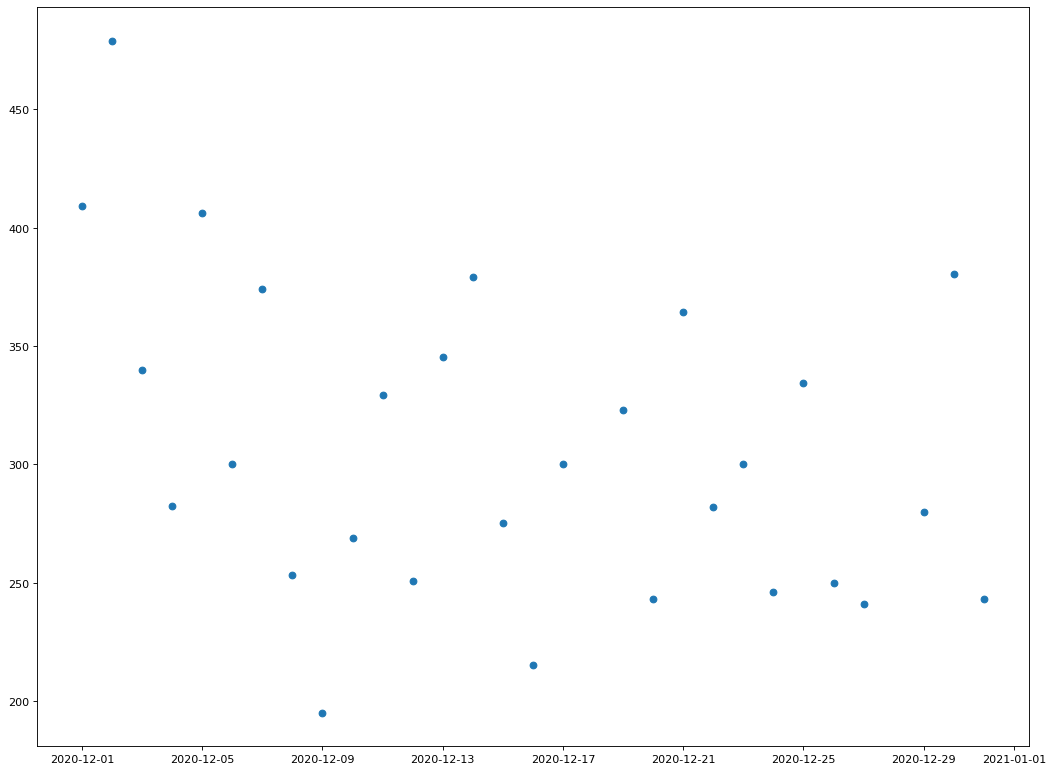

In [30]:
plt.figure(figsize= (16,12), dpi= 80)
plt.scatter(x=main_df['Date'],y=main_df['Calories'])

In [31]:
main_df[main_df['Calories'].isna()]

,Duration,Date,Pulse,Maxpulse,Calories
18,45,2020-12-18,90,112,NaN
28,60,2020-12-28,103,132,NaN


<Axes: xlabel='Duration', ylabel='Calories'>

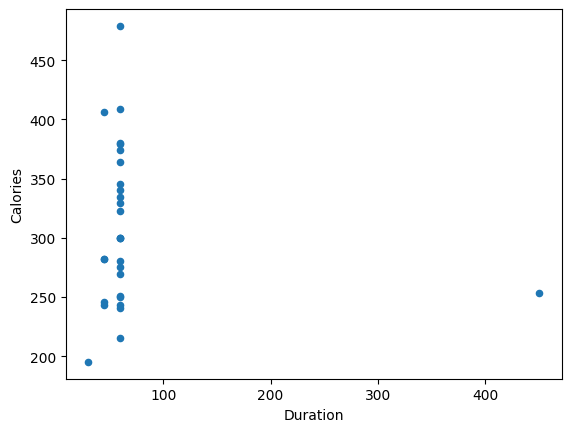

In [32]:
main_df.plot(kind='scatter',x='Duration',y='Calories')

In [33]:
main_df['Calories'].unique

<bound method Series.unique of 0     409.1
1     479.0
2     340.0
3     282.4
4     406.0
5     300.0
6     374.0
7     253.3
8     195.1
9     269.0
10    329.3
11    250.7
13    345.3
14    379.3
15    275.0
16    215.2
17    300.0
18      NaN
19    323.0
20    243.0
21    364.2
22    282.0
23    300.0
24    246.0
25    334.5
26    250.0
27    241.0
28      NaN
29    280.0
30    380.3
31    243.0
Name: Calories, dtype: float64>

## Data Frame completo

In [68]:
url2 = 'https://raw.githubusercontent.com/CharlesPrado23/Bootcamp_TurmaNoite/main/Pandas/data.csv'

In [69]:
df_clean = pd.read_csv(url2)

<Axes: xlabel='Duration', ylabel='Calories'>

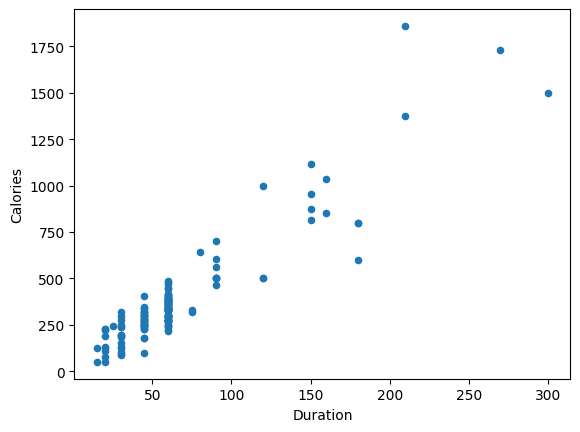

In [70]:
df_clean.plot(kind='scatter',x='Duration',y='Calories')

In [71]:
df_clean[df_clean.duplicated()]

,Duration,Pulse,Maxpulse,Calories
36,60,102,127,300.0
37,60,100,120,300.0
38,60,100,120,300.0
40,45,90,112,180.1
71,60,109,153,387.6
113,45,100,120,225.3
155,60,111,151,368.5


In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [73]:
df_clean.drop_duplicates(inplace= True)

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.3 KB


In [75]:
df_clean[df_clean['Calories'].isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


<Axes: xlabel='Duration', ylabel='Calories'>

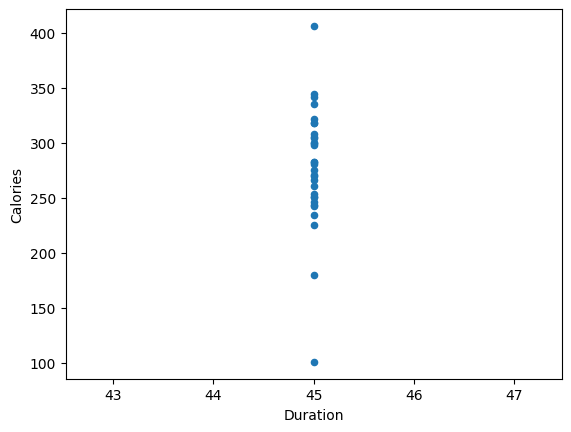

In [76]:
df_clean[df_clean['Duration']== 45].plot(kind='scatter',x='Duration',y='Calories')

<Axes: xlabel='Duration', ylabel='Calories'>

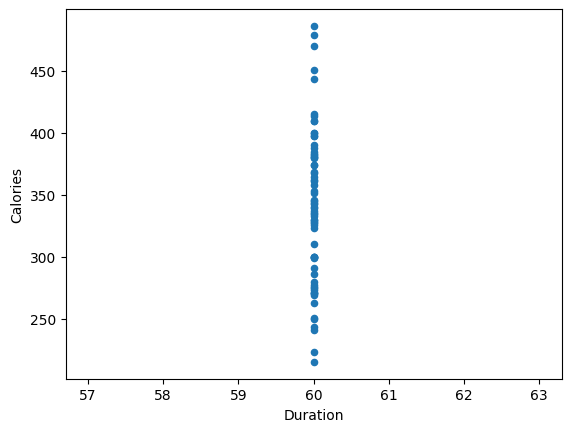

In [77]:
df_clean[df_clean['Duration']== 60].plot(kind='scatter',x='Duration',y='Calories')

In [79]:
df_clean['Duration'].unique()

array([ 60,  45,  30,  80,  20, 210, 160, 180, 150, 300,  90, 120, 270,
        15,  25,  75], dtype=int64)

In [80]:
df_clean['Calories'].mean()

379.4146496815287

In [81]:
df_clean[df_clean['Duration']== 60]['Calories'].mean()

340.27042253521125

In [82]:
df_clean[df_clean['Duration']== 45]['Calories'].mean()

277.7870967741935

In [83]:
df_clean[df_clean['Duration']== 30]['Calories'].mean()

192.125

In [1]:
df_clean.groupby('Duration').agg({'Calories':[np.size,np.mean,np.median,np.max,np.min]})

NameError: name 'df_clean' is not defined

In [89]:
mean_45 = df_clean[df_clean['Duration']== 45]['Calories'].mean()
mean_60 = df_clean[df_clean['Duration']== 60]['Calories'].mean()

#### solução 1  #trocar os valores nulos em 45 pela media que tem na duração de 45

In [2]:
df_clean.loc[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 45),'Calories'] = mean_45 


NameError: name 'mean_45' is not defined

In [64]:
df_clean.loc[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 45),'Calories']

Series([], Name: Calories, dtype: float64)

In [65]:
df_clean.loc[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 60),'Calories']

27    NaN
118   NaN
141   NaN
Name: Calories, dtype: float64

In [66]:
df_clean.loc[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 60),'Calories'] = mean_60

In [67]:
df_clean.loc[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 60),'Calories']

Series([], Name: Calories, dtype: float64)

#### solução 2

In [97]:
# df_clean[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 45)].fillna(value= mean_45, inplace= True)

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_15892\612885141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 45)].fillna(value= mean_45, inplace= True)


In [99]:
df_clean[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 45)] = df_clean[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 45)].fillna(mean_45)

In [101]:
df_clean.loc[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 45),'Calories']

Series([], Name: Calories, dtype: float64)

In [102]:
df_clean[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 60)] = df_clean[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 60)].fillna(mean_60)

In [103]:
df_clean.loc[(df_clean['Calories'].isna()) & (df_clean['Duration'] == 60),'Calories']

Series([], Name: Calories, dtype: float64)

In [105]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  162 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.3 KB


In [106]:
df_clean.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435095
std,43.151882,14.711588,16.471618,267.381894
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


In [107]:
df_clean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.923190
Pulse,-0.162098,1.000000,0.787035,0.019258
Maxpulse,0.003578,0.787035,1.000000,0.197465
Calories,0.923190,0.019258,0.197465,1.000000


<Axes: xlabel='Duration', ylabel='Calories'>

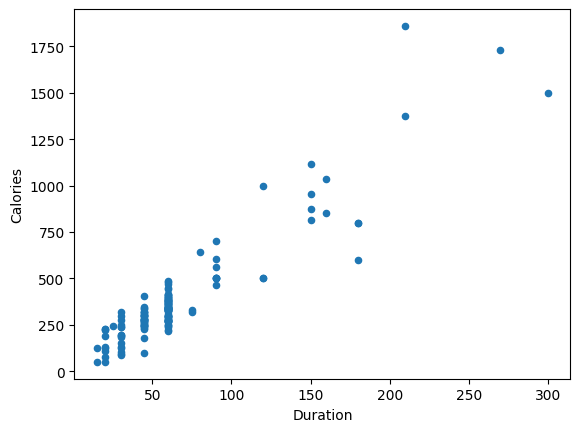

In [108]:
df_clean.plot(kind='scatter',x='Duration',y='Calories')

<Axes: xlabel='Pulse', ylabel='Calories'>

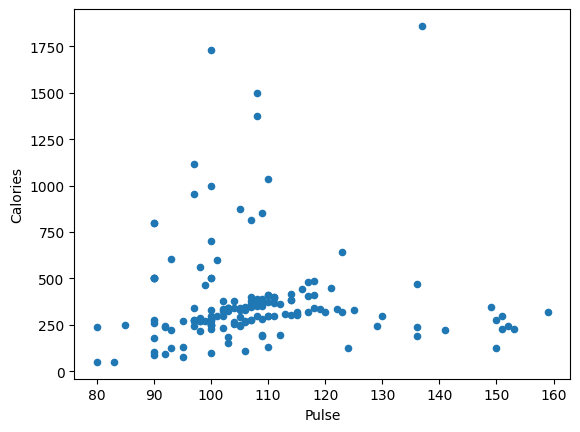

In [109]:
df_clean.plot(kind='scatter',x='Pulse',y='Calories')

<Axes: xlabel='Pulse', ylabel='Maxpulse'>

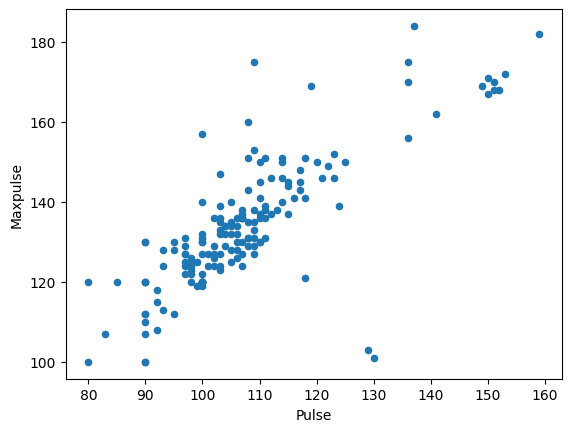

In [110]:
df_clean.plot(kind='scatter',x='Pulse',y='Maxpulse')

In [111]:
import seaborn as sns

<Axes: xlabel='Duration', ylabel='Calories'>

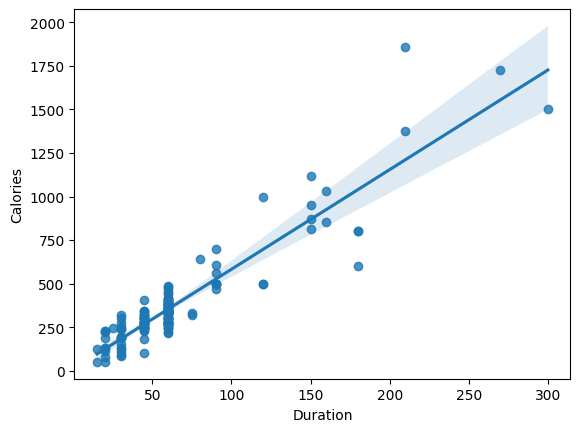

In [112]:
sns.regplot(x= 'Duration', y= 'Calories', data= df_clean)